In [1]:
# Importing Necessary Dependancies
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [ ]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [3]:
data = load_data(input("Enter a Stock Symbol:"))
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.615220,15.678981,15.547723,15.610239,15.571997,78541293
1,2010-01-05,15.620949,15.637387,15.480475,15.541497,15.503424,120638494
2,2010-01-06,15.588072,15.588072,15.102393,15.149715,15.112601,159744526
3,2010-01-07,15.178109,15.193053,14.760922,14.797037,14.760787,257533695
4,2010-01-08,14.744733,15.024933,14.672753,14.994298,14.957564,189680313


In [4]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,15.615220,15.678981,15.547723,15.610239,78541293
1,15.620949,15.637387,15.480475,15.541497,120638494
2,15.588072,15.588072,15.102393,15.149715,159744526
3,15.178109,15.193053,14.760922,14.797037,257533695
4,14.744733,15.024933,14.672753,14.994298,189680313


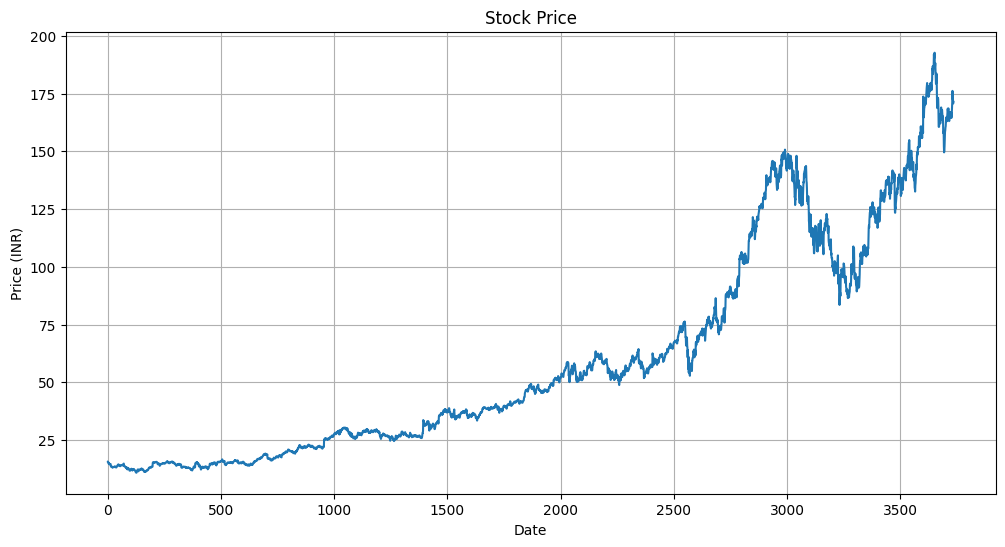

In [ ]:
# Visualizing the Closing Prices
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [6]:
df

,Open,High,Low,Close,Volume
0,15.615220,15.678981,15.547723,15.610239,78541293
1,15.620949,15.637387,15.480475,15.541497,120638494
2,15.588072,15.588072,15.102393,15.149715,159744526
3,15.178109,15.193053,14.760922,14.797037,257533695
4,14.744733,15.024933,14.672753,14.994298,189680313
...,...,...,...,...,...
3731,182.410004,183.789993,175.744995,176.139999,49698300
3732,174.720001,178.419998,172.559998,172.690002,32801900
3733,171.539993,173.820007,170.309998,172.649994,21752900
3734,171.240005,171.919998,169.485001,170.679993,16194000


In [7]:
# Plotting the moving average of 100 days
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3731    170.2297
3732    170.1903
3733    170.1349
3734    170.0461
3735    169.9928
Name: Close, Length: 3736, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

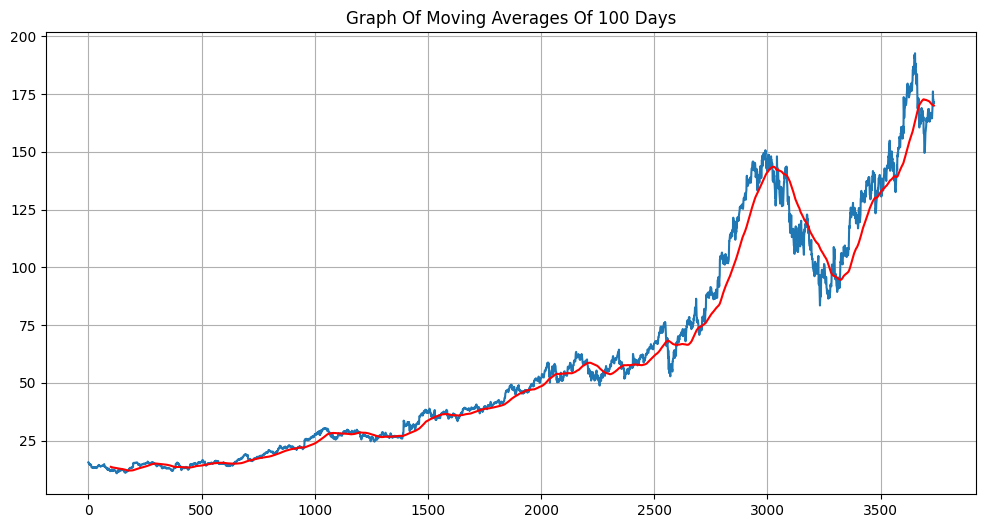

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [9]:

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3731    163.02645
3732    163.17545
3733    163.31375
3734    163.42730
3735    163.54580
Name: Close, Length: 3736, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

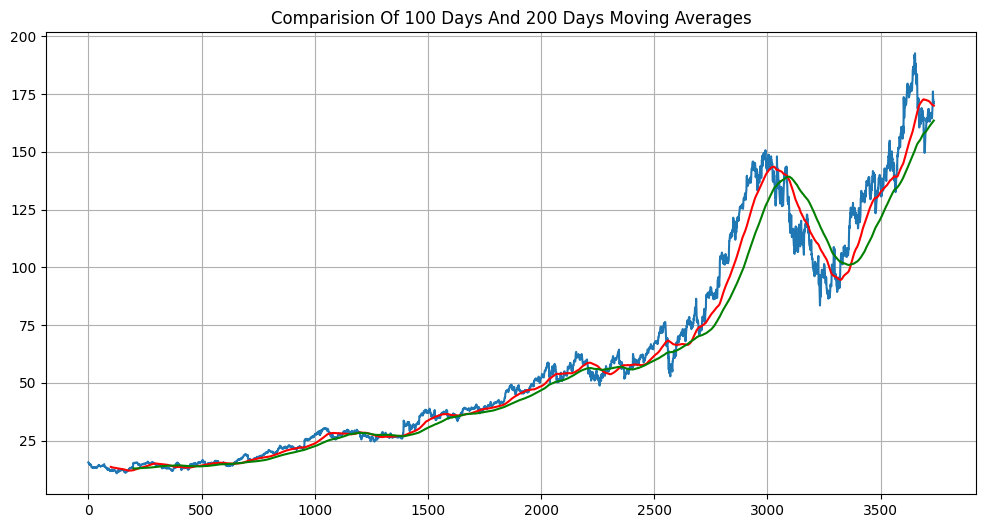

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [11]:
df.shape

(3736, 5)

In [12]:
# Splitting data into training (70%) and testing (30%)

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2615, 7)
(1121, 7)


In [13]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,15.615220,15.678981,15.547723,15.610239,15.571997,78541293
1,2010-01-05,15.620949,15.637387,15.480475,15.541497,15.503424,120638494
2,2010-01-06,15.588072,15.588072,15.102393,15.149715,15.112601,159744526
3,2010-01-07,15.178109,15.193053,14.760922,14.797037,14.760787,257533695
4,2010-01-08,14.744733,15.024933,14.672753,14.994298,14.957564,189680313


In [14]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2615,2020-05-26,71.863503,72.050003,70.606499,70.850998,70.677422,41212000
2616,2020-05-27,70.862503,71.086998,69.564499,70.891998,70.718323,33716000
2617,2020-05-28,69.843002,72.042000,69.800003,70.836502,70.662964,33844000
2618,2020-05-29,70.847000,71.628502,70.667503,71.445999,71.270973,36418000
2619,2020-06-01,70.919502,71.898003,70.900002,71.591003,71.415619,24342000


In [15]:
# Normalizing the Dataset using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [17]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.07253624],
       [0.07148632],
       [0.0655025 ],
       ...,
       [0.90838266],
       [0.90538909],
       [0.91120831]])

In [18]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [19]:
x_train.shape

(2515, 100, 1)

In [20]:
# Importing the Necessary Dependancies for the LSTM model
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [21]:
# Implemnting the LSTM Model for the Prediction
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\athai\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Training the model
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 22s 170ms/step - loss: 0.0629 - mean_absolute_error: 0.1752
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 181ms/step - loss: 0.0064 - mean_absolute_error: 0.0537
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 191ms/step - loss: 0.0054 - mean_absolute_error: 0.0484
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 198ms/step - loss: 0.0052 - mean_absolute_error: 0.0486
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 16s 200ms/step - loss: 0.0049 - mean_absolute_error: 0.0458
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 158ms/step - loss: 0.0040 - mean_absolute_error: 0.0431
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 166ms/step - loss: 0.0048 - mean_absolute_error: 0.0468
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 163ms/step - loss: 0.0037 - mean_absolute_error: 0.0421
Epoch 9/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - loss: 0.0042 - mean_absolute_error: 0.0432
Epoch 10/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 155ms/step - loss: 0.0042 - mean_absolute_error: 0.0439
Epoch 11/

In [25]:
model.save('./Models/keras_model.keras')

In [26]:
test_close.shape

(1121, 1)

In [27]:
past_100_days = pd.DataFrame(train_close[-100:])

In [28]:
test_df = pd.DataFrame(test_close)

In [29]:
final_df = pd.concat([past_100_days,test_df], ignore_index=True)

In [30]:
final_df.head()

,0
0,66.850998
1,68.368500
2,68.032997
3,69.710503
4,69.667000


In [31]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.1002653 ],
       [0.11111785],
       [0.10871847],
       ...,
       [0.85689657],
       [0.84280793],
       [0.84802867]])

In [32]:
input_data.shape

(1221, 1)

In [33]:
# Testing the Model
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [34]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1121, 100, 1)
(1121,)


In [35]:
# Making predictions and plotting the graph of predictions vs the actual

y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step


In [36]:
y_pred.shape

(1121, 1)

In [37]:
y_test

array([0.12887167, 0.12916488, 0.128768  , ..., 0.85689657, 0.84280793,
       0.84802867])

In [38]:
y_pred

array([[0.12754016],
       [0.12948793],
       [0.1314238 ],
       ...,
       [0.7314941 ],
       [0.7370458 ],
       [0.74163604]], dtype=float32)

In [39]:
scaler.scale_

array([0.00715159])

In [40]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

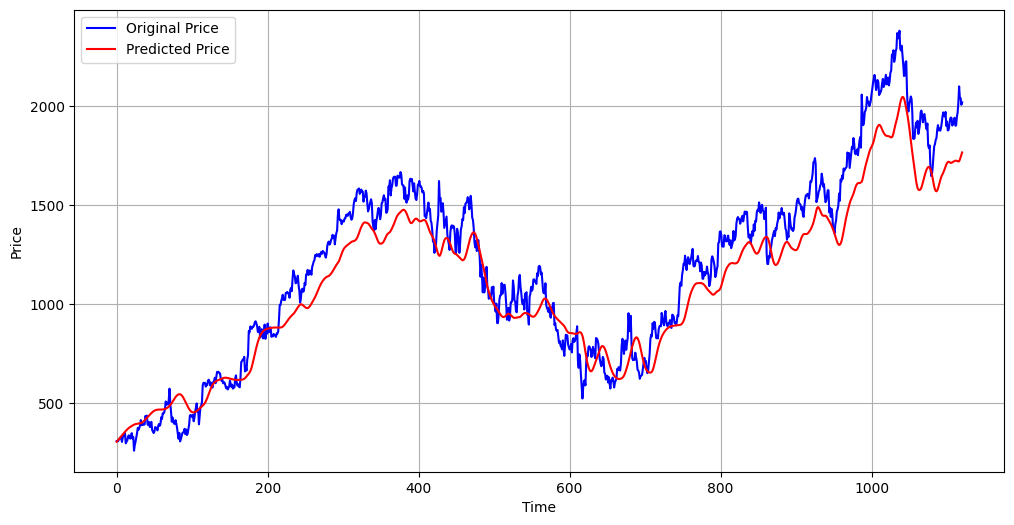

In [41]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
# Model Evaluation
# Calculating the mean absolute error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 10.87%


In [43]:
# Calculation of R2 Score
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.8965420902230112


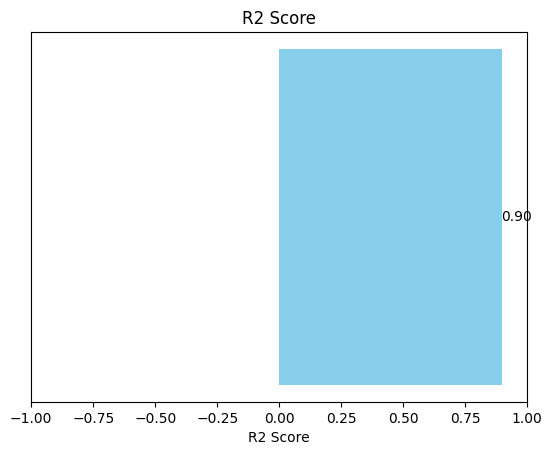

In [44]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

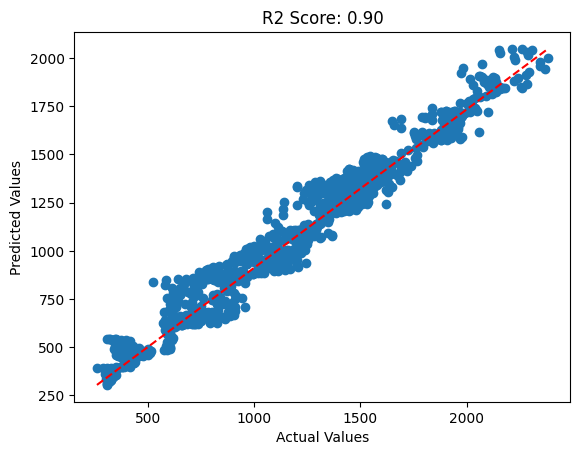

In [45]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()